In [32]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys 
sys.path.append('..')
import collections
import copy
import itertools
import aoc_utils as au
import math 
from tqdm import tqdm
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
input_text = au.read_txt_file_lines('input2.txt')
n_rows = len(input_text)
n_cols = len(input_text[0])
for ii in range(1, n_rows):
    assert len(input_text[ii]) == n_cols, f'row {ii} has {len(input_text[ii])} cols, not {n_cols}'
print(f'input has {n_rows} rows and {n_cols} cols')

input has 13 rows and 13 cols


In [34]:
input_mat = np.zeros((n_rows, n_cols), dtype=int)
for i_row, row in enumerate(input_text):
    for i_col, col in enumerate(row):
        el = int(col)
        assert el in [1, 2, 3, 4, 5, 6, 7, 8, 9]
        input_mat[i_row, i_col] = el

In [46]:
node = collections.namedtuple('node', 'x y')

def find_path_new(mat_weights):
    n_rows, n_cols = mat_weights.shape
    start_pos = node(0, 0)
    end_pos = (n_rows - 1, n_cols - 1)
    set_all_unvisited = set([node(i, j) for i in range(n_rows) for j in range(n_cols)])
    set_all_unvisited.remove(node(0, 0))
    set_all_visited = set([node(0, 0)])

    dict_cumulative_dist = {(0, 0): 0}

    prev_node = None
    curr_node = start_pos
    n_same_dir = 0 
    
    i_it = 0
    while len(set_all_unvisited) > 0 and end_pos not in set_all_visited:
        i_it += 1
        
        ## find neighbors that are not in set_all_visited
        list_possible_next_nodes = []
        if curr_node.x > 0:
            list_possible_next_nodes.append(node(curr_node.x - 1, curr_node.y))
        if curr_node.x < n_rows - 1:
            list_possible_next_nodes.append(node(curr_node.x + 1, curr_node.y))
        if curr_node.y > 0:
            list_possible_next_nodes.append(node(curr_node.x, curr_node.y - 1))
        if curr_node.y < n_cols - 1:
            list_possible_next_nodes.append(node(curr_node.x, curr_node.y + 1))
        list_possible_next_nodes = [x for x in list_possible_next_nodes if x in set_all_unvisited]
        
        # assert len(list_possible_next_nodes) > 0, f'no possible next nodes for {curr_node} at iteration {i_it}. visited {set_all_visited}'
        if len(list_possible_next_nodes) == 0:
            print(f'no possible next nodes for {curr_node} at iteration {i_it}. visited {set_all_visited}')
            for tmp_coords in set_all_unvisited:
                for tmp_coords2 in set_all_visited:
                    if np.abs(tmp_coords.x - tmp_coords2.x) + np.abs(tmp_coords.y - tmp_coords2.y) == 1:
                        list_possible_next_nodes.append(tmp_coords)
                        # break 

        if prev_node is not None:
            prev_dir = (curr_node.x - prev_node.x, curr_node.y - prev_node.y)
        else:
            prev_dir = None
        ## find the one with the lowest weight
        list_dist = []
        for i_node, node_next in enumerate(list_possible_next_nodes):
            if node_next in dict_cumulative_dist:
                existing_dist = dict_cumulative_dist[node_next]
            else:
                existing_dist = np.inf

            ## remove the one that is in the same direction as the previous one
            if prev_node is not None:
                new_dir = (node_next.x - curr_node.x, node_next.y - curr_node.y)
                if n_same_dir >= 2 and new_dir == prev_dir:
                    list_dist.append(np.inf)
                    continue

            new_dist = dict_cumulative_dist[curr_node] + mat_weights[node_next.x, node_next.y]
            best_dist = min(existing_dist, new_dist)
            list_dist.append(best_dist)
            dict_cumulative_dist[node_next] = best_dist

        arg_min = np.argmin(list_dist)
        next_node = list_possible_next_nodes[arg_min]
        set_all_visited.add(next_node)
        set_all_unvisited.remove(next_node)

        if prev_dir is not None:
            new_dir = (next_node.x - curr_node.x, next_node.y - curr_node.y)
            if new_dir == prev_dir:
                n_same_dir += 1
            else:
                n_same_dir = 0

        prev_node = curr_node
        curr_node = next_node

    return dict_cumulative_dist

def create_heatmap(dict_cumulative_dist, input_mat):
    n_rows, n_cols = input_mat.shape
    heatmap = np.zeros((n_rows, n_cols))
    for i_row in range(n_rows):
        for i_col in range(n_cols):
            if (i_row, i_col) in dict_cumulative_dist:
                heatmap[i_row, i_col] = dict_cumulative_dist[(i_row, i_col)]
            else:
                heatmap[i_row, i_col] = np.nan
    return heatmap

no possible next nodes for node(x=12, y=0) at iteration 35. visited {node(x=4, y=0), node(x=12, y=1), node(x=3, y=1), node(x=5, y=1), node(x=8, y=0), node(x=0, y=2), node(x=10, y=0), node(x=2, y=2), node(x=1, y=0), node(x=6, y=2), node(x=7, y=1), node(x=12, y=0), node(x=4, y=2), node(x=3, y=0), node(x=5, y=0), node(x=8, y=2), node(x=9, y=1), node(x=0, y=1), node(x=11, y=1), node(x=1, y=2), node(x=2, y=1), node(x=6, y=1), node(x=7, y=0), node(x=3, y=2), node(x=4, y=1), node(x=5, y=2), node(x=9, y=0), node(x=0, y=0), node(x=8, y=1), node(x=11, y=0), node(x=1, y=1), node(x=2, y=0), node(x=10, y=1), node(x=7, y=2), node(x=6, y=0)}
no possible next nodes for node(x=0, y=11) at iteration 86. visited {node(x=4, y=0), node(x=4, y=9), node(x=5, y=1), node(x=8, y=0), node(x=0, y=5), node(x=2, y=2), node(x=2, y=11), node(x=6, y=2), node(x=7, y=1), node(x=4, y=2), node(x=3, y=6), node(x=5, y=3), node(x=8, y=2), node(x=9, y=1), node(x=0, y=7), node(x=2, y=4), node(x=1, y=8), node(x=6, y=4), node(x=

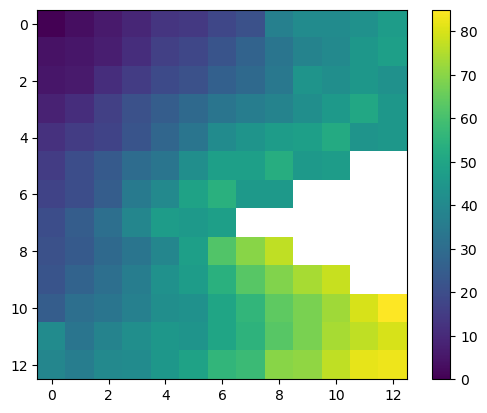

In [47]:
dict_cum_dist = find_path_new(input_mat)
print(f'Final heat: {dict_cum_dist[(n_rows - 1, n_cols - 1)]}')
plt.imshow(create_heatmap(dict_cum_dist, input_mat).T)
plt.colorbar()

In [12]:
input_mat

array([[2, 4, 1, 3, 4, 3, 2, 3, 1, 1, 3, 2, 3],
       [3, 2, 1, 5, 4, 5, 3, 5, 3, 5, 6, 2, 3],
       [3, 2, 5, 5, 2, 4, 5, 6, 5, 4, 2, 5, 4],
       [3, 4, 4, 6, 5, 8, 5, 8, 4, 5, 4, 5, 2],
       [4, 5, 4, 6, 6, 5, 7, 8, 6, 7, 5, 3, 6],
       [1, 4, 3, 8, 5, 9, 8, 7, 9, 8, 4, 5, 4],
       [4, 4, 5, 7, 8, 7, 6, 9, 8, 7, 7, 6, 6],
       [3, 6, 3, 7, 8, 7, 7, 9, 7, 9, 6, 5, 3],
       [4, 6, 5, 4, 9, 6, 7, 9, 8, 6, 8, 8, 7],
       [4, 5, 6, 4, 6, 7, 9, 9, 8, 6, 4, 5, 3],
       [1, 2, 2, 4, 6, 8, 6, 8, 6, 5, 5, 6, 3],
       [2, 5, 4, 6, 5, 4, 8, 8, 8, 7, 7, 3, 5],
       [4, 3, 2, 2, 6, 7, 4, 6, 5, 5, 5, 3, 3]])